HDFC BANK STOCK PRICE PREDICTION

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [231]:
# importing required librarys

In [230]:
import pandas as pd

In [4]:
df=pd.read_csv('/content/drive/My Drive/HDFC BANK/IndianFinancialNews.csv')

In [5]:
df.head()

,Unnamed: 0,Date,Title,Description
0,0,"May 26, 2020, Tuesday","ATMs to become virtual bank branches, accept d...","Close to 14.6 per cent (or 35,000) of the 240,..."
1,1,"May 26, 2020, Tuesday",IDFC First Bank seniors to forgo 65% of bonus ...,"V Vaidyanathan, managing director and chief ex..."
2,2,"May 25, 2020, Monday","Huge scam in YES Bank for many years, says Enf...",Rana Kapoor's wife also charged with abetting ...
3,3,"May 24, 2020, Sunday","Bank of Maharashtra sanctioned Rs 2,789 cr in ...",The bank said it was now gearing up to extend ...
4,4,"May 23, 2020, Saturday",DCB Bank's profit before tax declines 37.6% to...,Net profit for the financial year ended March ...


In [6]:
df.isnull().sum()

Unnamed: 0       0
Date             0
Title            0
Description    710
dtype: int64

In [232]:
# cheking for null values and droping description as our taget feature is Title of news

In [9]:
df=df.drop(['Unnamed: 0','Description'],axis=1)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    50000 non-null  object
 1   Title   50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [11]:
df=df.dropna()

In [12]:
import numpy as np

In [233]:
# as our primary focus is on HDFC bank stock price but news datset contains news for other banks as well 
# using below for loop we only left with news related to HDFC banks and other general financial news

In [13]:
c=[]
a=['dcb','maharashtra','idfc','yes','kotakbank','indusindbk','axisbank','sbin','baroda','canara','overseas','punjab']
for j in range(0,len(df)):
    for i in str(df['Title'].iloc[j]).lower().split():
        if i in a:
            df.replace({df['Title'].iloc[j]:np.nan},inplace=True)
            break

In [14]:
df.isnull().sum()

Date        0
Title    2056
dtype: int64

In [15]:
df=df.dropna()

In [16]:
df.head()

,Date,Title
0,"May 26, 2020, Tuesday","ATMs to become virtual bank branches, accept d..."
6,"May 22, 2020, Friday","Retail, MSME loans to get cheaper as RBI cuts ..."
7,"May 22, 2020, Friday","RBI forecasts economic contraction, announces ..."
8,"May 22, 2020, Friday","RBI extends loan moratorium till Aug 31, silen..."
9,"May 22, 2020, Friday","Govt seeks to raise Rs 14,000 cr from second t..."


In [17]:
df=df.dropna()

In [ ]:
### initially sentiment-score was generated using NLTK's inbuilt librerys like TextBlob,Vedar but result were not that good 
# and hence decided to go with RoberTa based transformer for sentiment analysis by hugging face

In [ ]:
### why transformers?

In [19]:
from transformers import pipeline

In [20]:
sen=pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [247]:
### why transformers 

In [21]:

r=[]
for i in range(0,len(df)):
    e=sen(df.iloc[i][1])
    if (e[0]['label'])=='NEGATIVE':
        c=e[0]['score']
        r.append(-c)
    else:
        d=e[0]['score']
        r.append(d)
    

In [22]:
len(r)

47944

In [23]:
df['sentiments']=r

In [234]:
# here we have left with date along its sentiment score for thaat days 

In [35]:
df.head(10)

,Date,sentiments
0,"April 01, 2003, Tuesday",-0.406975
1,"April 01, 2004, Thursday",0.134486
2,"April 01, 2005, Friday",0.093540
3,"April 01, 2006, Saturday",-0.412556
4,"April 01, 2007, Sunday",0.277827
5,"April 01, 2008, Tuesday",-0.531415
6,"April 01, 2009, Wednesday",-0.664772
7,"April 01, 2010, Thursday",-0.321536
8,"April 01, 2011, Friday",-0.481890
9,"April 01, 2012, Sunday",-0.865293


In [235]:
# but for single days we have got more than 1 news and hence using group by function mean sentiment score calcualted for 
# that day

In [25]:
new_df=df.groupby(['Date'],as_index=False)['sentiments'].mean()

In [26]:
new_df.shape

(6037, 2)

In [27]:
df=pd.DataFrame(new_df)

In [28]:
df.head()

,Date,sentiments
0,"April 01, 2003, Tuesday",-0.406975
1,"April 01, 2004, Thursday",0.134486
2,"April 01, 2005, Friday",0.093540
3,"April 01, 2006, Saturday",-0.412556
4,"April 01, 2007, Sunday",0.277827


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6037 entries, 0 to 6036
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        6037 non-null   object 
 1   sentiments  6037 non-null   float64
dtypes: float64(1), object(1)
memory usage: 94.5+ KB


In [236]:
# converting into datetime format

In [36]:
df['Date']=pd.to_datetime(df['Date'])

In [37]:
df=df.set_index(df['Date'])

In [38]:
df=df.drop(['Date'],axis=1)

In [39]:
df.shape

(6037, 1)

In [40]:
df.head()

,sentiments
Date,
2003-04-01,-0.406975
2004-04-01,0.134486
2005-04-01,0.093540
2006-04-01,-0.412556
2007-04-01,0.277827


In [41]:
##### 

In [237]:
# reading dataset of historical stock price for HDFC bank

In [101]:
new_df=pd.read_csv('/content/drive/My Drive/HDFC BANK/HDFCBANK.csv')

In [102]:
new_df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,HDFCBANK,EQ,157.40,166.00,170.00,166.00,170.00,170.00,169.52,33259,5.638122e+11,NaN,NaN,NaN
1,2000-01-04,HDFCBANK,EQ,170.00,182.00,183.45,171.00,174.00,173.80,174.99,168710,2.952261e+12,NaN,NaN,NaN
2,2000-01-05,HDFCBANK,EQ,173.80,170.00,173.90,165.00,168.00,166.95,169.20,159820,2.704094e+12,NaN,NaN,NaN
3,2000-01-06,HDFCBANK,EQ,166.95,168.00,170.00,165.30,168.95,168.30,168.44,85026,1.432166e+12,NaN,NaN,NaN
4,2000-01-07,HDFCBANK,EQ,168.30,162.15,171.00,162.15,170.75,168.35,166.79,85144,1.420158e+12,NaN,NaN,NaN


In [103]:
new_df.tail()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
5301,2021-04-26,HDFCBANK,EQ,1414.15,1413.00,1429.00,1402.75,1407.55,1404.8,1413.19,15085476,2.131861e+15,291268.0,9791881.0,0.6491
5302,2021-04-27,HDFCBANK,EQ,1404.80,1407.25,1442.00,1404.80,1435.05,1438.7,1430.40,10296453,1.472810e+15,233200.0,5650216.0,0.5488
5303,2021-04-28,HDFCBANK,EQ,1438.70,1436.25,1479.00,1431.00,1475.00,1476.8,1463.19,12051970,1.763438e+15,197146.0,7196647.0,0.5971
5304,2021-04-29,HDFCBANK,EQ,1476.80,1486.20,1503.65,1461.00,1471.65,1472.5,1481.15,12039276,1.783196e+15,252296.0,4818551.0,0.4002
5305,2021-04-30,HDFCBANK,EQ,1472.50,1445.00,1453.80,1407.50,1412.90,1412.3,1421.13,17616451,2.503529e+15,447876.0,8982938.0,0.5099


In [104]:
df1=new_df.loc[:,['Date','Close','Volume','Open']]

In [105]:
df1.head()

,Date,Close,Volume,Open
0,2000-01-03,170.00,33259,166.00
1,2000-01-04,173.80,168710,182.00
2,2000-01-05,166.95,159820,170.00
3,2000-01-06,168.30,85026,168.00
4,2000-01-07,168.35,85144,162.15


In [106]:
df1.shape

(5306, 4)

In [238]:
# converting into datetime format

In [107]:
df1['Date']=pd.to_datetime(df1['Date'])

In [108]:
df1=df1.set_index(df1['Date'])

In [109]:
df1=df1.drop(['Date'],axis=1)

In [110]:
import matplotlib.pyplot as plt

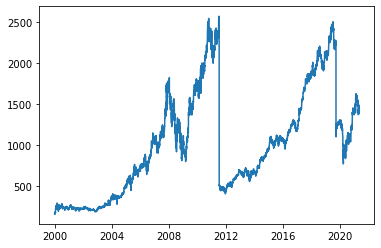

In [111]:
plt.plot(df1['Open'])

In [112]:
df1.head()

,Close,Volume,Open
Date,,,
2000-01-03,170.00,33259,166.00
2000-01-04,173.80,168710,182.00
2000-01-05,166.95,159820,170.00
2000-01-06,168.30,85026,168.00
2000-01-07,168.35,85144,162.15


In [239]:
# append sentiment score for historical stock price dataset and combinning both datasets

In [114]:
final_df=pd.concat([df1,df],axis=1)

In [115]:
final_df.head()

,Close,Volume,Open,sentiments
Date,,,,
2000-01-03,170.00,33259.0,166.00,NaN
2000-01-04,173.80,168710.0,182.00,NaN
2000-01-05,166.95,159820.0,170.00,NaN
2000-01-06,168.30,85026.0,168.00,NaN
2000-01-07,168.35,85144.0,162.15,NaN


In [116]:
final_df['sentiments'].iloc[0:778].nunique()

1

In [117]:
final_df['sentiments'].iloc[6842::].nunique()

1

In [118]:
final_df=final_df.iloc[776:6844,:]

In [119]:
final_df.head()

,Close,Volume,Open,sentiments
Date,,,,
2003-02-07,246.80,295679.0,243.00,NaN
2003-02-10,246.35,78241.0,245.90,-0.832856
2003-02-11,245.60,149638.0,244.75,-0.493905
2003-02-12,248.70,278563.0,247.15,-0.426046
2003-02-13,NaN,NaN,NaN,-0.552299


In [120]:
final_df.tail()

,Close,Volume,Open,sentiments
Date,,,,
2020-05-20,857.10,20007413.0,836.45,-0.995486
2020-05-21,859.55,24239683.0,861.45,-0.394577
2020-05-22,838.85,21025849.0,850.00,-0.970369
2020-05-26,852.40,19002589.0,857.00,-0.964801
2020-05-27,903.65,28013227.0,859.90,NaN


In [121]:
final_df.isnull().sum()

Close         1771
Volume        1771
Open          1771
sentiments      31
dtype: int64

In [240]:
# for few of days we havent got any news and hence considering sentiments as nutral
# for saterdays and sundays , friday's values are carry forwarded

In [122]:
final_df['sentiments'].fillna(0.0,inplace=True)

In [123]:
final_df['Close']=final_df['Close'].ffill()

In [124]:
final_df['Volume']=final_df['Volume'].ffill()

In [125]:
final_df['Open']=final_df['Open'].ffill()

In [126]:
final_df.isnull().sum()

Close         0
Volume        0
Open          0
sentiments    0
dtype: int64

### Appling lstm model without sentiments

In [127]:
final_df.head()

,Close,Volume,Open,sentiments
Date,,,,
2003-02-07,246.80,295679.0,243.00,0.000000
2003-02-10,246.35,78241.0,245.90,-0.832856
2003-02-11,245.60,149638.0,244.75,-0.493905
2003-02-12,248.70,278563.0,247.15,-0.426046
2003-02-13,248.70,278563.0,247.15,-0.552299


In [128]:
a=final_df.loc[:,['sentiments']]

In [129]:
len(a)

6068

In [130]:
final_df1=final_df.iloc[:,:-1]

In [131]:
import numpy as np
import math

In [132]:
import tensorflow as tf

In [133]:
import keras

In [134]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten

In [135]:
from sklearn.preprocessing import StandardScaler

In [136]:
std_df=StandardScaler()


In [137]:
std_df1=std_df.fit(final_df1)

In [138]:
std_df2=std_df.transform(final_df1)

In [139]:
df3=pd.DataFrame(std_df2)

In [140]:
a=list(final_df1.columns)

In [141]:
df3.columns=a

In [142]:
df3.head(21)

,Close,Volume,Open
0,-1.495911,-0.472223,-1.502970
1,-1.496660,-0.533972,-1.498139
2,-1.497908,-0.513696,-1.500055
3,-1.492748,-0.477083,-1.496057
4,-1.492748,-0.477083,-1.496057
5,-1.493497,-0.501215,-1.492143
6,-1.493497,-0.501215,-1.492143
7,-1.493497,-0.543947,-1.496224
8,-1.496992,-0.538785,-1.495474
9,-1.487672,-0.459290,-1.491143


In [143]:
train_df_size=len(df3)*0.8

In [144]:
test_df_size=len(df3)-train_df_size

In [145]:
train_df_size

4854.400000000001

In [146]:
test_df_size

1213.5999999999995

In [147]:
train_df=df3.iloc[0:4854,::]

In [148]:
test_df=df3.iloc[4854 : ,::]

In [149]:
x_train=[]
y_train=[]

In [150]:
no_d_future=1
no_d_past=20

In [241]:
# looking 20 days past values and traning on that rercored 
# this is because if u look into technical analysis we have 20 moving avarage which is consider to be one of 
# the best parameter for technical analysis
# it acts as a support for stock



In [151]:
for i  in range(no_d_past,len(train_df)-no_d_future+1):
    x_train.append(train_df.iloc[i-no_d_past:i,0:3])
    y_train.append(train_df.iloc[i+no_d_future-1:i+no_d_future,[2]])

In [152]:
x_train=np.array(x_train)

In [153]:
x_train[0]

array([[-1.49591062, -0.47222282, -1.50296954],
       [-1.49665957, -0.53397158, -1.49813915],
       [-1.49790781, -0.51369602, -1.50005465],
       [-1.49274841, -0.47708348, -1.49605709],
       [-1.49274841, -0.47708348, -1.49605709],
       [-1.49349736, -0.50121524, -1.4921428 ],
       [-1.49349736, -0.50121524, -1.4921428 ],
       [-1.49349736, -0.54394677, -1.49622365],
       [-1.49699243, -0.53878452, -1.49547411],
       [-1.48767223, -0.45929023, -1.49114341],
       [-1.49000228, -0.52283546, -1.48298172],
       [-1.49025193, -0.5274482 , -1.48806196],
       [-1.49025193, -0.5274482 , -1.48806196],
       [-1.49457917, -0.54402884, -1.49622365],
       [-1.49807424, -0.54987606, -1.4959738 ],
       [-1.49291485, -0.5332886 , -1.49713976],
       [-1.49333093, -0.53654532, -1.49380846],
       [-1.49083444, -0.49576305, -1.49414159],
       [-1.50248469, -0.54592046, -1.4912267 ],
       [-1.50240148, -0.54024108, -1.50455191]])

In [154]:
y_train[0]

,Open
20,-1.503386


In [155]:
y_train=np.array(y_train)

In [156]:
model=Sequential()

In [157]:
model.add(LSTM(128,activation='relu',input_shape=(20,3),return_sequences=True))
model.add(LSTM(64,activation='relu',return_sequences=True))
model.add(LSTM(32,activation='relu',return_sequences=False))

model.add(Dense(1))

          

In [158]:
model.compile(optimizer='adam',loss='mse')

In [159]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 20, 128)           67584     
                                                                 
 lstm_6 (LSTM)               (None, 20, 64)            49408     
                                                                 
 lstm_7 (LSTM)               (None, 32)                12416     
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 129,441
Trainable params: 129,441
Non-trainable params: 0
_________________________________________________________________


In [161]:
model.fit(x_train,y_train,batch_size=32, epochs=40,validation_split=0.2)

Epoch 1/30
121/121 [==============================] - 11s 92ms/step - loss: 0.0060 - val_loss: 6.3800e-04
Epoch 2/30
121/121 [==============================] - 9s 74ms/step - loss: 0.0059 - val_loss: 3.7317e-04
Epoch 3/30
121/121 [==============================] - 8s 69ms/step - loss: 0.0064 - val_loss: 3.7328e-04
Epoch 4/30
121/121 [==============================] - 9s 77ms/step - loss: 0.0053 - val_loss: 3.0339e-04
Epoch 5/30
121/121 [==============================] - 8s 65ms/step - loss: 0.0052 - val_loss: 5.2850e-04
Epoch 6/30
121/121 [==============================] - 10s 80ms/step - loss: 0.0055 - val_loss: 3.5618e-04
Epoch 7/30
121/121 [==============================] - 8s 64ms/step - loss: 0.0054 - val_loss: 0.0011
Epoch 8/30
121/121 [==============================] - 10s 82ms/step - loss: 0.0052 - val_loss: 3.1903e-04
Epoch 9/30
121/121 [==============================] - 7s 60ms/step - loss: 0.0048 - val_loss: 2.4127e-04
Epoch 10/30
121/121 [==============================] - 1

In [162]:
x_test=[]
y_test=[]

In [163]:
for i in range(no_d_past,len(test_df)-no_d_future+1):
    x_test.append(test_df.iloc[i-no_d_past:i,0:3])
    y_test.append(test_df.iloc[i+no_d_future-1:i+no_d_future,2])

In [164]:
pred_values=model.predict(np.array(x_test))

38/38 [==============================] - 1s 18ms/step


In [165]:
actual_values=list(np.array(y_test))

In [166]:
df=pd.DataFrame()

In [167]:

df['actual']=list(np.array(y_test))

In [168]:
df['predicted_values']=pred_values

In [169]:
pred_values

array([[ 0.08179615],
       [ 0.07546458],
       [ 0.07277267],
       ...,
       [-0.7359342 ],
       [-0.77754015],
       [-0.7385522 ]], dtype=float32)

In [170]:
import numpy as np

In [171]:
actual_rmse=np.sqrt(np.mean(np.square(df['actual'])))
actual_rmse

array([1.25182536])

In [172]:
pred_rmse=np.sqrt(np.mean(np.square(pred_values)))

In [173]:
pred_rmse

1.2882466

In [244]:
# for this project i have dedcided RMSE to be deciding factor 
# wee can notice that actual rsme is 1.251 and pedicted rmse without sentiments score  is 1.288 

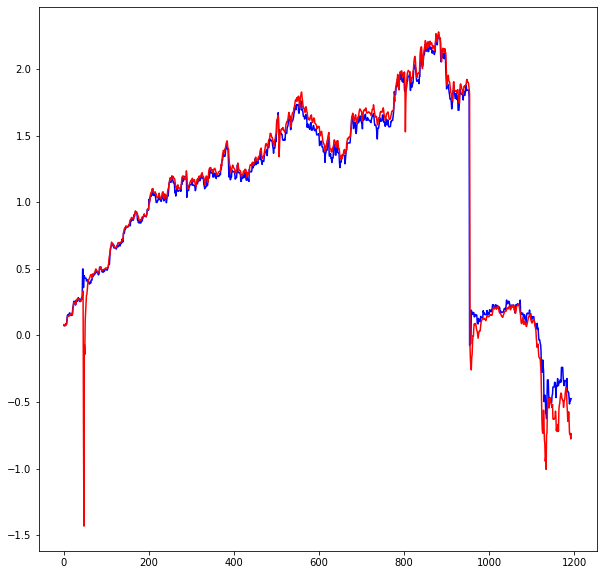

In [174]:
plt.figure(figsize=(10,10))
plt.plot(df['actual'],color='blue',label='actual_values')
plt.plot(df['predicted_values'],color='red',label='predicted_values')


In [175]:
n_day_for_pre=30

In [176]:
forcast_dates=pd.date_range(start='2020-05-27',periods=n_day_for_pre,freq='1d')

In [177]:
focast=list(forcast_dates)

In [178]:
forcast = model.predict(np.array(x_test)[-30:])

1/1 [==============================] - 0s 37ms/step


In [179]:
values=list(forcast)

In [180]:
values=np.repeat(values,3,axis=-1)

In [181]:
actual_values=std_df.inverse_transform(values)

In [182]:
forcast_df=pd.DataFrame()

In [183]:
forcast_df['dates']=pd.Series(forcast_dates)

In [184]:
forcast_df['values']=actual_values[:,[0]]

In [185]:
forcast_df['dates']=pd.to_datetime(forcast_df['dates'])

In [242]:
# doing further prediction for complete one month

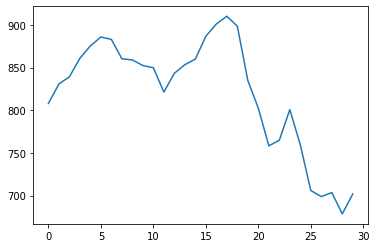

In [186]:

plt.plot(forcast_df['values'])

### using Sentiment scores

In [187]:
#from google.colab import drive
#drive.mount('/content/drive')

In [188]:
final_df1=final_df.iloc[:,:]

In [189]:
from sklearn.preprocessing import StandardScaler

In [190]:
scaler=StandardScaler()

In [191]:
scaled_df=scaler.fit_transform(final_df1)

In [192]:
df3=pd.DataFrame(scaled_df)

In [193]:
a=list(final_df1.columns)

In [194]:
df3.columns=a

In [195]:
train_df=df3.iloc[0:4854,::]

In [196]:
test_df=df3.iloc[4854 : ,::]

In [197]:
x_train=[]
y_train=[]

In [198]:
no_d_future=1
no_d_past=20

In [199]:
for i  in range(no_d_past,len(train_df)-no_d_future+1):
    x_train.append(train_df.iloc[i-no_d_past:i,0:4])
    y_train.append(train_df.iloc[i+no_d_future-1:i+no_d_future,[2]])

In [200]:
x_train=np.array(x_train)
y_train=np.array(y_train)


In [204]:
model=Sequential()

In [205]:
model.add(LSTM(128,activation='relu',input_shape=(20,4),return_sequences=True))
model.add(LSTM(64,activation='relu',return_sequences=True))
model.add(LSTM(32,activation='relu',return_sequences=False))

model.add(Dense(1))


In [206]:
model.compile(optimizer='adam',loss='mse')

In [207]:
model.fit(x_train,y_train,batch_size=32, epochs=40,validation_split=0.2)

Epoch 1/40
121/121 [==============================] - 14s 78ms/step - loss: 0.1874 - val_loss: 0.0025
Epoch 2/40
121/121 [==============================] - 9s 71ms/step - loss: 0.0215 - val_loss: 0.0026
Epoch 3/40
121/121 [==============================] - 8s 70ms/step - loss: 0.0143 - val_loss: 0.0019
Epoch 4/40
121/121 [==============================] - 9s 76ms/step - loss: 0.0129 - val_loss: 0.0015
Epoch 5/40
121/121 [==============================] - 8s 70ms/step - loss: 0.0099 - val_loss: 0.0015
Epoch 6/40
121/121 [==============================] - 9s 76ms/step - loss: 0.0099 - val_loss: 0.0014
Epoch 7/40
121/121 [==============================] - 8s 67ms/step - loss: 0.0079 - val_loss: 9.8979e-04
Epoch 8/40
121/121 [==============================] - 10s 80ms/step - loss: 0.0089 - val_loss: 7.2685e-04
Epoch 9/40
121/121 [==============================] - 14s 113ms/step - loss: 0.0067 - val_loss: 0.0051
Epoch 10/40
121/121 [==============================] - 7s 61ms/step - loss: 0.0

In [208]:
x_test=[]
y_test=[]

In [209]:
for i  in range(no_d_past,len(test_df)-no_d_future+1):
    x_test.append(test_df.iloc[i-no_d_past:i,0:4])
    y_test.append(test_df.iloc[i+no_d_future-1:i+no_d_future,2])

In [210]:
pred_values_with_S=model.predict(np.array(x_test))

38/38 [==============================] - 2s 30ms/step


In [211]:
actual_values=list(np.array(y_test))

In [212]:
df['pred_values_with_S']=pred_values_with_S

In [213]:
df

,actual,predicted_values,pred_values_with_S
0,[0.07415306820018536],0.081796,0.077614
1,[0.07273726398700377],0.075465,0.065685
2,[0.07456948120406234],0.072773,0.052319
3,[0.07456948120406234],0.075963,0.062972
4,[0.07456948120406234],0.077992,0.065358
...,...,...,...
1189,[-0.5144883540803176],-0.731953,-0.702212
1190,[-0.4728470536926192],-0.743725,-0.723499
1191,[-0.49191876927018513],-0.735934,-0.773766
1192,[-0.4802592051616296],-0.777540,-0.737226


In [214]:
actual_rmse=np.sqrt(np.mean(np.square(df['actual'])))
actual_rmse

array([1.25182536])

In [215]:
rmse_pred_values_with_S=np.sqrt(np.mean(np.square(pred_values_with_S)))

In [216]:
rmse_pred_values_with_S

1.2598718

In [246]:
# we can noticed that RMSE for prediction with sentiments score reduced to 1.259 where actual one is 1.251
# hence we can say that adding sentiment score factor we can improve our prediction accuracy

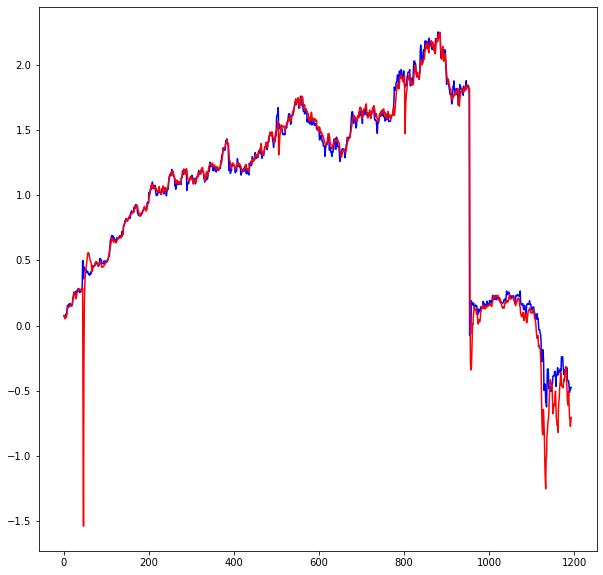

In [217]:
plt.figure(figsize=(10,10))
plt.plot(df['actual'],color='blue',label='actual_values')
plt.plot(df['pred_values_with_S'],label='pred_values_with_S',color='red')

In [225]:
#### saving model for future use

In [226]:
import pickle

In [227]:
filename='opening_price_prediction_model '

In [229]:
pickle.dump(model,open(filename,'wb'))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
......lstm
.........cell
............vars
...............0
...............1
...............2
.........vars
......lstm_1
.........cell
............vars
...............0
...............1
...............2
.........vars
......lstm_2
.........cell
............vars
...............0
...............1
...............2
.........vars
...metrics
......mean
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........21
.........22
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
variables.h5                                   2023-03-19 07:45:01      159